In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [22]:
path='/content/drug200.csv'
df=pd.read_csv(path)
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [24]:
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [25]:
label_encoder=LabelEncoder()
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['BP']=label_encoder.fit_transform(df['BP'])
df['Cholesterol']=label_encoder.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [28]:
custom_map={'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
df['Drug_num']=df['Drug'].map(custom_map)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


In [29]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0
Drug_num,0


In [30]:
df.drop(['Drug'],axis=1).corr()['Drug_num']

,Drug_num
Age,-0.004828
Sex,-0.098573
BP,0.372868
Cholesterol,0.055629
Na_to_K,0.589120
Drug_num,1.000000


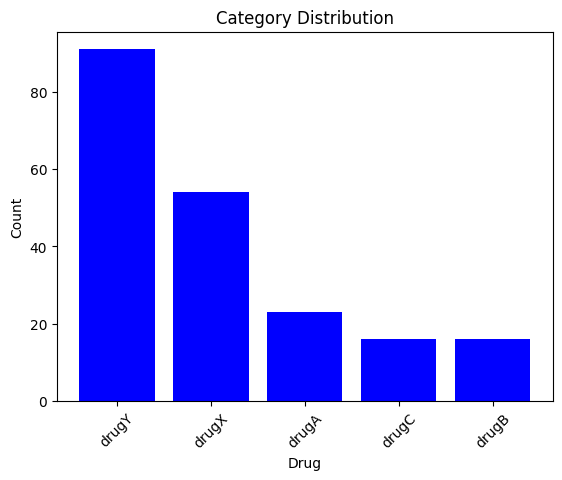

In [31]:
category_counts = df['Drug'].value_counts()

# Plot the count plot
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

In [32]:
X=df.drop(['Drug_num','Drug'],axis=1)
y=df['Drug_num']

In [33]:
X_trainset,X_testset,y_trainset,y_testset=train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [45]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [46]:
tree_predictions = drugTree.predict(X_testset)

In [47]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  1.0


<function matplotlib.pyplot.show(close=None, block=None)>

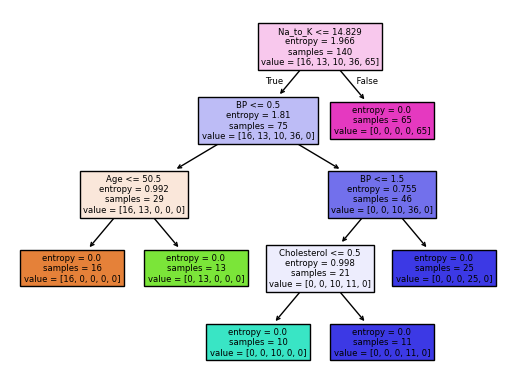

In [48]:
plot_tree(drugTree,filled=True,feature_names=X.columns)
plt.show

In [49]:
# New patient details
# Age: 30, Sex: Male, BP: High, Cholesterol: Normal, Na_to_K: 15
new_patient = pd.DataFrame({
    'Age': [30],
    'Sex': [1],           # Male encoded as 1
    'BP': [2],            # High BP encoded as 2
    'Cholesterol': [0],   # Normal cholesterol encoded as 0
    'Na_to_K': [15]
})


In [50]:
predicted_label = drugTree.predict(new_patient)
print("Predicted Drug:", predicted_label[0])


Predicted Drug: 4


In [51]:
reverse_map = {0:'DrugA', 1:'DrugB', 2:'DrugC', 3:'DrugX', 4:'DrugY'}
predicted_drug = reverse_map[predicted_label[0]]
print("Predicted Drug Name:", predicted_drug)


Predicted Drug Name: DrugY
